# Part D: MNIST Digit Classifier using Keras

## Introduction

The **MNIST** (Modified National Institute of Standards and Technology) dataset is a classic benchmark in machine learning. It consists of **70,000 grayscale images** of handwritten digits (0–9), each of size **28×28 pixels**. The dataset is split into 60,000 training and 10,000 test images.

**Objectives:**
- Load and explore the MNIST dataset
- Preprocess data for neural network training
- Build, compile, and train a sequential Keras model
- Evaluate performance with confusion matrix and classification report
- Visualize predictions and highlight misclassifications

In [1]:
# CELL 2 - Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

TensorFlow version: 2.19.0
Keras version: 3.10.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28) | Labels shape: (60000,)
Test set shape: (10000, 28, 28) | Labels shape: (10000,)
Pixel value range: 0 - 255


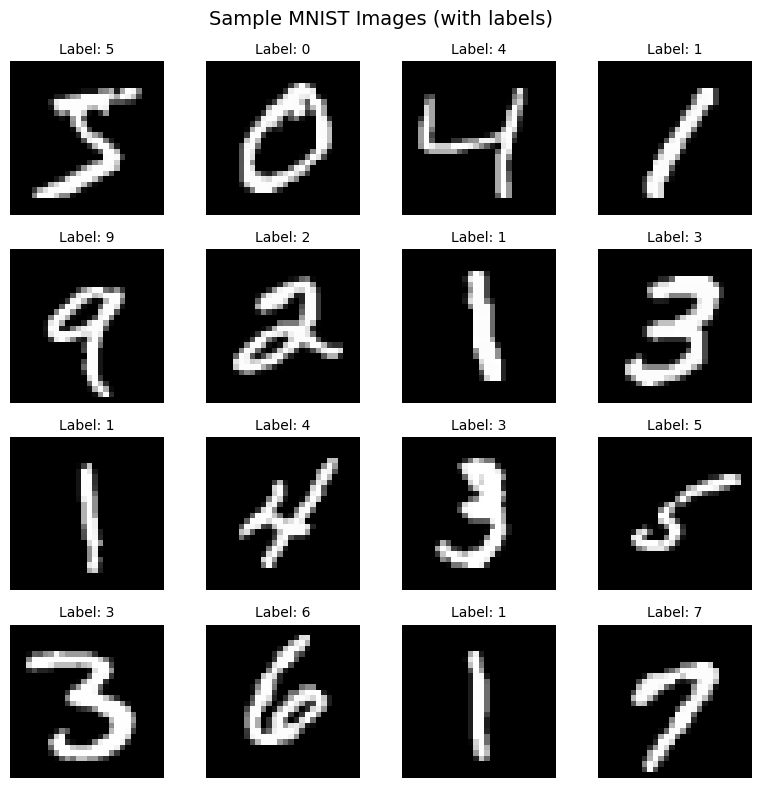

In [2]:
# CELL 3 - Load and Explore Data
# Load MNIST from Keras datasets (downloaded automatically on first run)
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Print shapes of train and test sets
print("Training set shape:", X_train.shape, "|", "Labels shape:", y_train.shape)
print("Test set shape:", X_test.shape, "|", "Labels shape:", y_test.shape)
print("Pixel value range:", X_train.min(), "-", X_train.max())

# Display sample images: 4x4 grid of 16 images with labels
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle("Sample MNIST Images (with labels)", fontsize=14)
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title(f"Label: {y_train[i]}", fontsize=10)
    ax.axis("off")
plt.tight_layout()
plt.show()

In [3]:
# CELL 4 - Data Preprocessing
# Normalize pixel values from [0, 255] to [0, 1] for better training
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshape: (samples, 28, 28) -> (samples, 28, 28, 1) for CNN compatibility (optional)
# For Flatten-based model we keep (samples, 28, 28); Flatten will handle it
# No reshape needed when using Flatten(28, 28) -> 784

# One-hot encode labels for categorical_crossentropy
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print("Preprocessed X_train shape:", X_train.shape)
print("Preprocessed X_test shape:", X_test.shape)
print("Preprocessed y_train (one-hot) shape:", y_train_cat.shape)
print("Preprocessed y_test (one-hot) shape:", y_test_cat.shape)

Preprocessed X_train shape: (60000, 28, 28)
Preprocessed X_test shape: (10000, 28, 28)
Preprocessed y_train (one-hot) shape: (60000, 10)
Preprocessed y_test (one-hot) shape: (10000, 10)


In [4]:
# CELL 5 - Build Neural Network Model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 28x28 -> 784
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(num_classes, activation="softmax")
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# CELL 6 - Compile and Train
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Train for 10 epochs with 20% validation split; store history for plotting
history = model.fit(
    X_train, y_train_cat,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8301 - loss: 0.5439 - val_accuracy: 0.9551 - val_loss: 0.1457
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9492 - loss: 0.1656 - val_accuracy: 0.9673 - val_loss: 0.1088
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9607 - loss: 0.1283 - val_accuracy: 0.9707 - val_loss: 0.0980
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9663 - loss: 0.1085 - val_accuracy: 0.9751 - val_loss: 0.0877
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9732 - loss: 0.0923 - val_accuracy: 0.9753 - val_loss: 0.0878
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.9734 - loss: 0.0837 - val_accuracy: 0.9739 - val_loss: 0.0929
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9768 - loss: 0.0743 - val_accuracy: 0.9755 - val_loss: 0.0931
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9793 - loss: 0.0

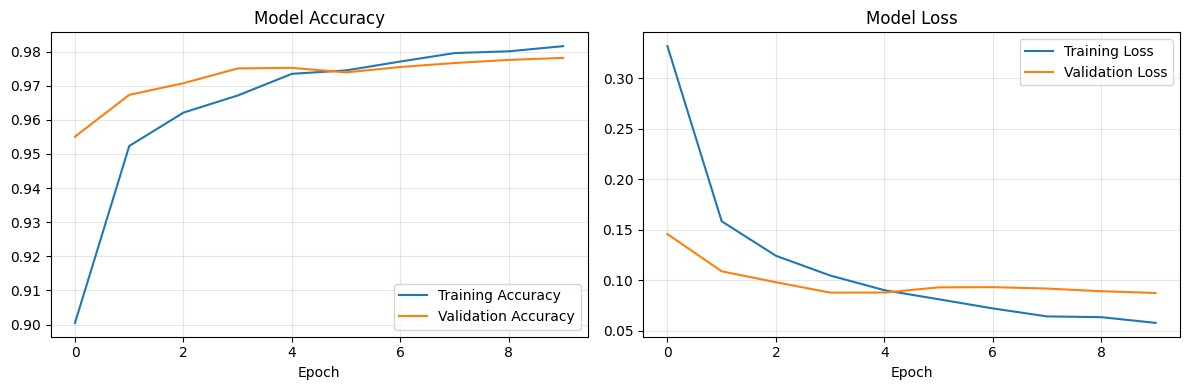

In [6]:
# CELL 7 - Plot Training Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy: training vs validation
ax1.plot(history.history["accuracy"], label="Training Accuracy")
ax1.plot(history.history["val_accuracy"], label="Validation Accuracy")
ax1.set_title("Model Accuracy")
ax1.set_xlabel("Epoch")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Loss: training vs validation
ax2.plot(history.history["loss"], label="Training Loss")
ax2.plot(history.history["val_loss"], label="Validation Loss")
ax2.set_title("Model Loss")
ax2.set_xlabel("Epoch")
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [7]:
# CELL 8 - Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat, verbose=1)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9778 - loss: 0.0904

Test Loss: 0.0773
Test Accuracy: 0.9814 (98.14%)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


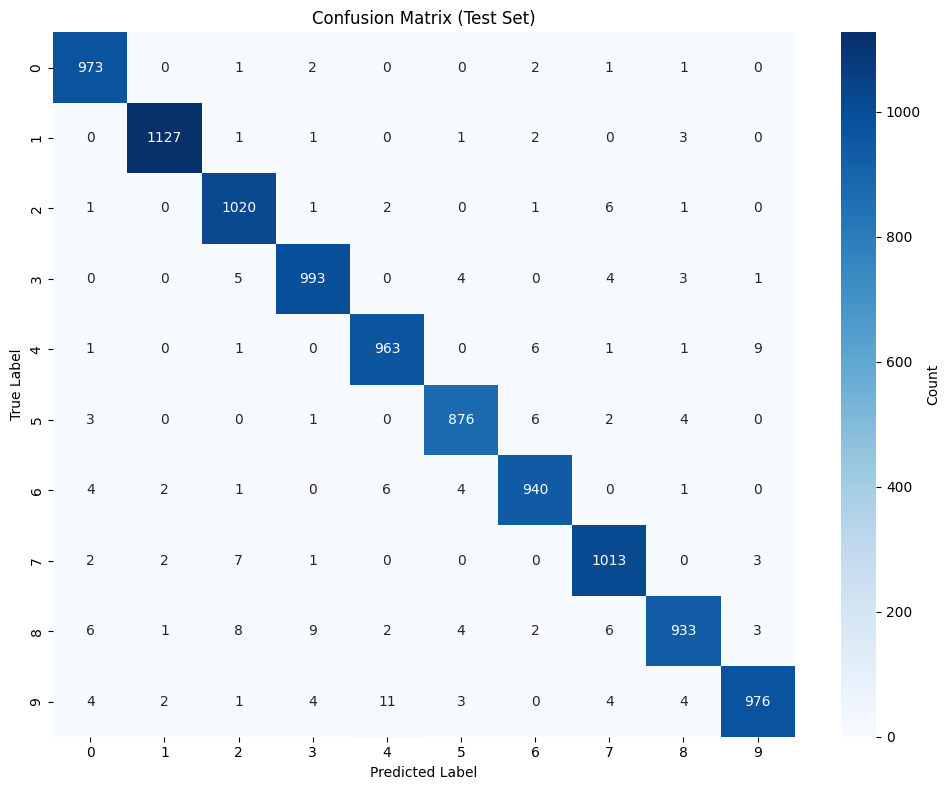

In [8]:
# CELL 9 - Confusion Matrix
# Get predicted class indices (not one-hot)
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Build confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display as seaborn heatmap with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=range(10), yticklabels=range(10),
            cbar_kws={"label": "Count"})
plt.title("Confusion Matrix (Test Set)")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()

In [9]:
# CELL 10 - Classification Report
print("Classification Report (per digit):")
print(classification_report(y_test, y_pred, target_names=[str(i) for i in range(10)]))
print(f"Overall accuracy (from report): {np.mean(y_pred == y_test):.4f}")

Classification Report (per digit):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.96      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Overall accuracy (from report): 0.9814


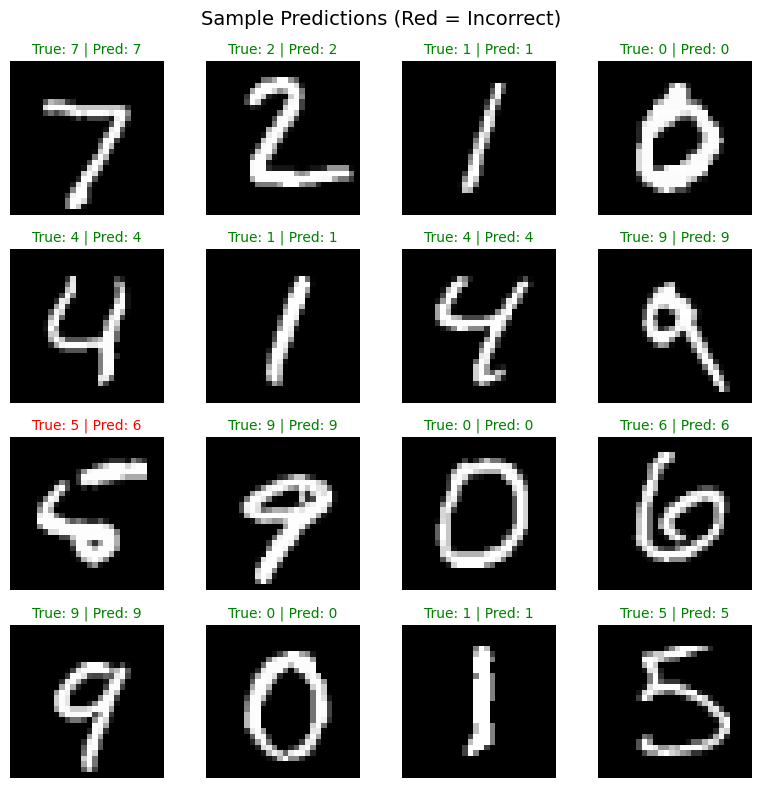

In [10]:
# CELL 11 - Sample Predictions Visualization
# Use first 16 test samples (or random subset)
n_show = 16
indices = np.arange(len(X_test))[:n_show]

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.suptitle("Sample Predictions (Red = Incorrect)", fontsize=14)
for i, ax in enumerate(axes.flat):
    idx = indices[i]
    ax.imshow(X_test[idx], cmap="gray")
    true_label = y_test[idx]
    pred_label = y_pred[idx]
    color = "red" if true_label != pred_label else "green"
    ax.set_title(f"True: {true_label} | Pred: {pred_label}", color=color, fontsize=10)
    ax.axis("off")
plt.tight_layout()
plt.show()

## Summary

- **Dataset:** MNIST — 60,000 training and 10,000 test images (28×28 grayscale digits 0–9).
- **Model:** Sequential MLP with Flatten, two hidden Dense layers (256 and 128 units, ReLU), Dropout (0.3), and a 10-class Softmax output.
- **Training:** Adam optimizer, categorical cross-entropy, 10 epochs with 20% validation split.
- **Results:** Check the test accuracy, confusion matrix, and classification report above. Misclassified digits are shown in red in the sample predictions.
- **Next steps:** Try more epochs, different architectures (e.g. CNN), or data augmentation to improve performance further.